In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from math import pi

t = np.arange(0, 100.1, 0.1)

def spacecraft_system(a, b, k, J):
    controller = ct.tf(k * np.array([1, a]), np.array([1, b]))
    plant = ct.tf([1], [J*1, 0, 0])
    sys = ct.series(controller, plant)
    sys_cl = ct.feedback(sys, 1)
    return sys_cl

In [2]:

# Part (a)
a = 1
b = 8
k = 10.8e+08
J = 10.8e+08

sys = spacecraft_system(a, b, k, J)
print(sys)

<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

                 1.08e+09 s + 1.08e+09
  ---------------------------------------------------
  1.08e+09 s^3 + 8.64e+09 s^2 + 1.08e+09 s + 1.08e+09


Since this is a step function I can directly multiply the inputs

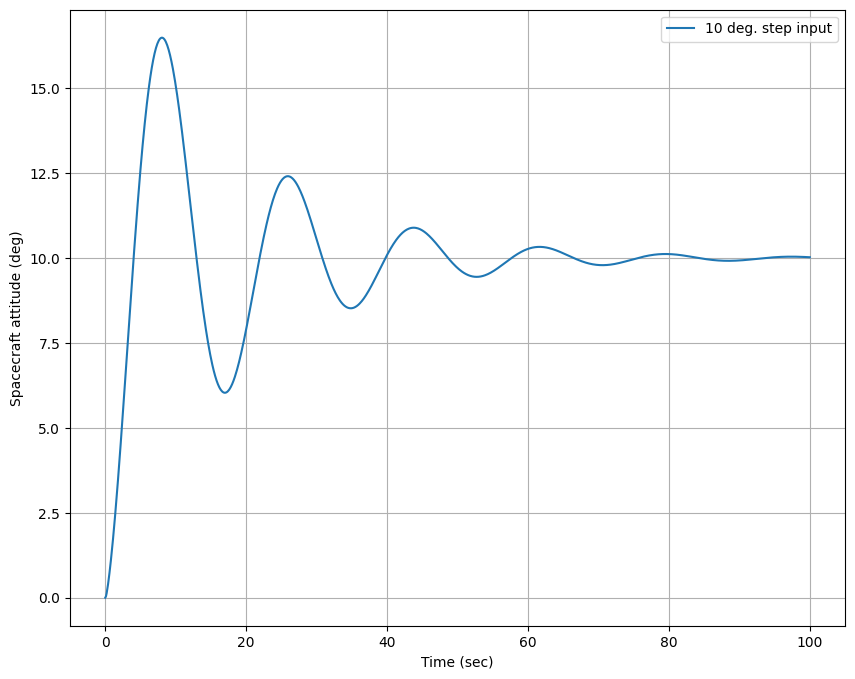

In [3]:
# b Nominal case
ten_degrees_input = 10 * pi / 180
sys_100 = sys * ten_degrees_input
output_100 = sys_100.step_response(t).outputs

plt.figure(figsize=(10, 8))
plt.plot(t, output_100 * 180 / pi, label='10 deg. step input', linestyle='-')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Spacecraft attitude (deg)')
plt.legend()
plt.show()

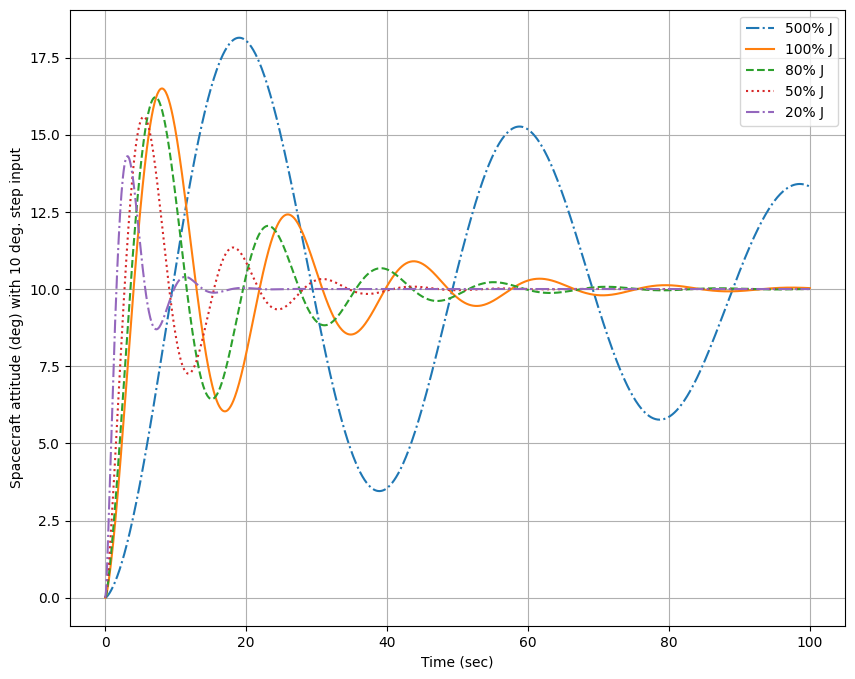

In [4]:
# c
# Off-nominal case 80%
sys_80 = spacecraft_system(a, b, k, J * 0.8) * ten_degrees_input
output_80 = sys_80.step_response(t).outputs

# Off-nominal case 50%
sys_50 = spacecraft_system(a, b, k, J * 0.5) * ten_degrees_input
output_50 = sys_50.step_response(t).outputs

sys_20 = spacecraft_system(a, b, k, J * 0.2) * ten_degrees_input
output_20 = sys_20.step_response(t).outputs

sys_500 = spacecraft_system(a, b, k, J * 5.0) * ten_degrees_input
output_500 = sys_500.step_response(t).outputs

plt.figure(figsize=(10, 8))

plt.plot(t, output_500 * 180 / pi, label='500% J', linestyle='-.')
plt.plot(t, output_100 * 180 / pi, label='100% J', linestyle='-')
plt.plot(t, output_80 * 180 / pi, label='80% J', linestyle='--')
plt.plot(t, output_50 * 180 / pi, label='50% J', linestyle=':')
plt.plot(t, output_20 * 180 / pi, label='20% J', linestyle='-.')

plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Spacecraft attitude (deg) with 10 deg. step input')
plt.legend()
plt.show()